<a href="https://colab.research.google.com/github/taufiqhidayatulloh/pcvk/blob/main/pcvk_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MODUL 3 - PCVK**
Nama: Ahmad Taufiq Hidayatulloh <br>
NIM: 2241720207 <br>
Kelas: TI-3D

<hr>

## **PRAKTIKUM**

In [86]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt
import numpy as np

### **Soal 1**
Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

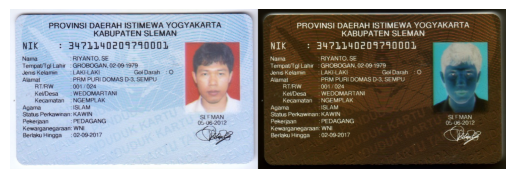

In [54]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/ktp.jpg')
img_original = cv.cvtColor(img, cv.COLOR_BGR2RGB).astype(np.int32)
img_negative = cv.cvtColor(img, cv.COLOR_BGR2RGB).astype(np.int32)
width = img_negative.shape[0]
height = img_negative.shape[1]



img_negative[0:width, 0:height, 0] = 255 - img_negative[0:width, 0:height, 0]
img_negative[0:width, 0:height, 1] = 255 - img_negative[0:width, 0:height, 1]
img_negative[0:width, 0:height, 2] = 255 - img_negative[0:width, 0:height, 2]
final_frame = cv.hconcat((img_original, img_negative))
plt.axis("off")
plt.imshow(final_frame)

### **Soal 2**
Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


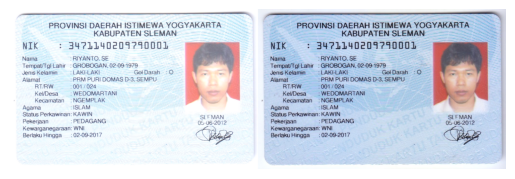

In [56]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/ktp.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB).astype(np.int32)

print("Mengubah kontras dan tingkat kecerahan citra")
print("----------------------------------------------")

# Input brightness adjustment
brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))

# Adjust brightness
img_brightness = np.clip(img + brightness, 0, 255).astype(np.uint8)

# Input contrast adjustment
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Proses menambah kontras
factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
img_contrast = np.clip(factor * (img - 128) + 128, 0, 255).astype(np.uint8)

# Gabungkan gambar asli dengan gambar setelah perubahan brightness dan contrast
final_frame = cv.hconcat((img_brightness, img_contrast))

plt.imshow(final_frame)
plt.axis('off')
plt.show()


### **Soal 3**
Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------------------------------
Masukkan nilai kecerahan: 50


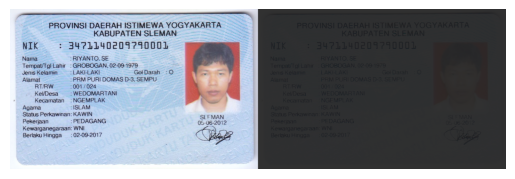

In [88]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/ktp.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB).astype(np.int32)

print(" Mengubah kontras dan tingkat kecerahan citra dengan Transformasi Log")
print("----------------------------------------------------------------------")

# Input brightness adjustment
brightness = int(input("Masukkan nilai kecerahan: "))

# Adjust brightness
c = brightness / np.log(1 + np.max(img))
# c = brightness
img_brightness = np.clip((c * np.log(1 + img)), 0, 255)
img_brightness = img_brightness.astype(np.uint8)
# Gabungkan gambar asli dengan gambar setelah perubahan brightness dan contrast
final_frame = cv.hconcat((img.astype(np.uint8), img_brightness))

plt.imshow(final_frame)
plt.axis('off')
plt.show()

## **Soal 4**
Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

A. Averaging

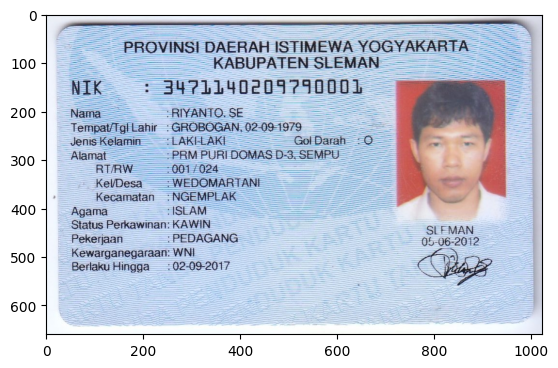

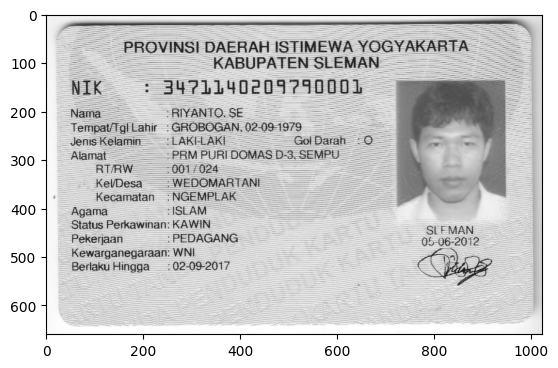

In [107]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/ktp.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB).astype(np.float32)

# Transformasi grayscale menggunakan metode averaging
img_averaging = np.mean(img, axis=2)
img_averaging = np.clip(img_averaging, 0, 255).astype(np.uint8)


plt.imshow(img.astype(np.uint8))
plt.show()
plt.imshow(img_averaging, cmap='gray')
plt.show()


B. Lightness

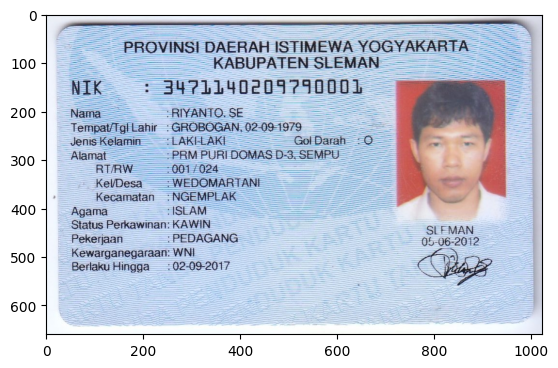

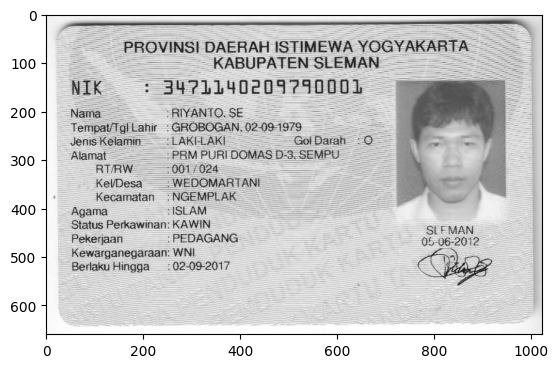

In [109]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/ktp.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB).astype(np.float32)

# Transformasi grayscale menggunakan metode lightness
max_channel = np.max(img, axis=2)
min_channel = np.min(img, axis=2)
img_lightness = (max_channel + min_channel) / 2
img_lightness = np.clip(img_lightness, 0, 255).astype(np.uint8)


plt.imshow(img.astype(np.uint8))
plt.show()
plt.imshow(img_lightness, cmap='gray')
plt.show()


C. Luminance

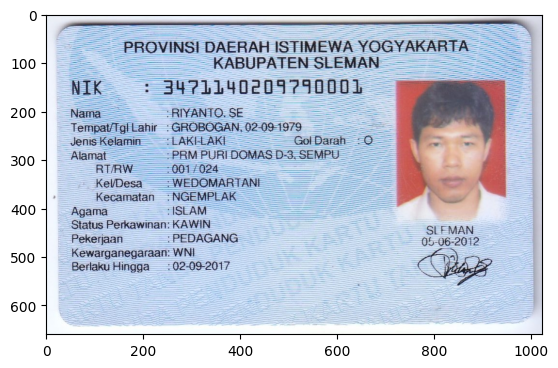

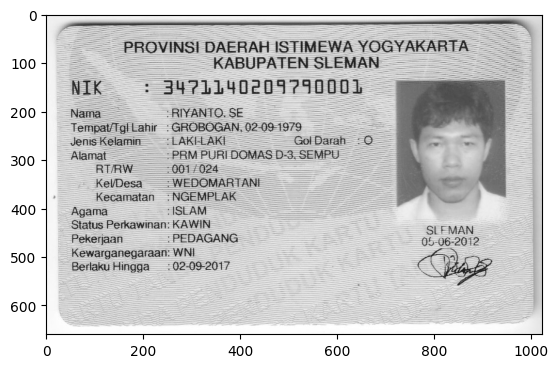

In [110]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/ktp.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB).astype(np.float32)

# Transformasi grayscale menggunakan metode luminance
red_channel = img[:,:,0] * 0.21
green_channel = img[:,:,1] * 0.72
blue_channel = img[:,:,2] * 0.07
img_luminance = red_channel + green_channel + blue_channel
img_luminance = np.clip(img_luminance, 0, 255).astype(np.uint8)

plt.imshow(img.astype(np.uint8))
plt.show()
plt.imshow(img_luminance, cmap='gray')
plt.show()


## **Soal 5**
Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

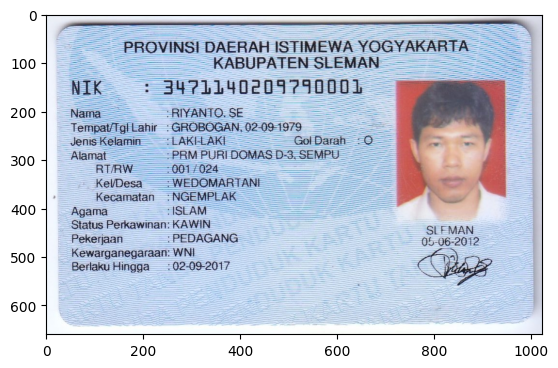

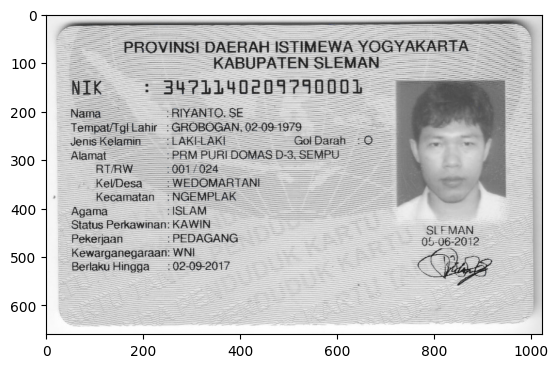

In [130]:
# Load the image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 5/PCVK/Images/ktp.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert BGR to RGB

# Convert the image to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray_rgb = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)  # Convert grayscale to RGB for consistency

# Define the range for the blue color in BGR format
lower_blue = np.array([100, 0, 0], dtype=np.uint8)
upper_blue = np.array([150, 80, 80], dtype=np.uint8)

# Create a mask for the blue color
mask = cv.inRange(img, lower_blue, upper_blue)

# Create an output image where blue parts are original and others are grayscale
result = np.where(mask[:, :, None].astype(bool), img_rgb, img_gray_rgb)

# Original image
plt.imshow(img_rgb)
plt.show()

# Processed image
plt.imshow(result)
plt.show()
